In [ ]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='b006ce71d52680fa7d8a5b4f0baa0a36')
DGS10 = fred.get_series('DGS10')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
import pandas as pd
from fredapi import Fred
import datetime
from datetime import date

start_date='2000-01-01'
end_date = date.today().strftime('%Y-%m-%d')

tickers=['DGS5','DGS10','DGS20','DGS30']
df=pd.DataFrame()
for ticker in tickers:
    data= fred.get_series(ticker, start_date, end_date)
    df = pd.concat([df, pd.DataFrame(data,columns=[ticker])],axis=1)
df.dropna(inplace=True)
df.head()
#df.columns=['date','DGS5','DGS10','DGS20','DGS30']
# Download the 30-year Treasury constant maturity rate data (GS30) for the specified date range
#DGS30_data = fred.get_series('DGS30', start_date, end_date)
# Convert the data to a pandas DataFrame
#DGS30_df = pd.DataFrame(DGS30_data, columns=['GS30'])
#print(DGS30_df.head())

,DGS5,DGS10,DGS20,DGS30
2000-01-03,6.50,6.58,6.94,6.61
2000-01-04,6.40,6.49,6.84,6.53
2000-01-05,6.51,6.62,6.95,6.64
2000-01-06,6.46,6.57,6.86,6.58
2000-01-07,6.42,6.52,6.82,6.55


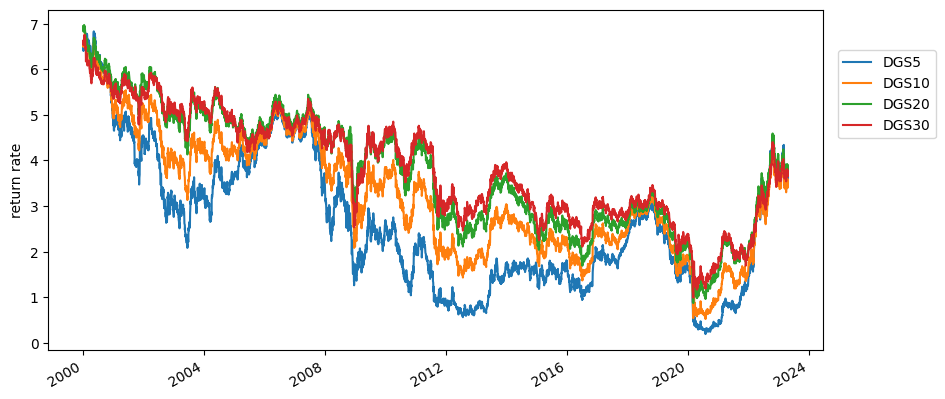

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,5))
plt.ylabel("return rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

In [ ]:
df = df.reset_index()
df.columns=['date','DGS5','DGS10','DGS20','DGS30']
df

,date,DGS5,DGS10,DGS20,DGS30
0,2000-01-03,6.50,6.58,6.94,6.61
1,2000-01-04,6.40,6.49,6.84,6.53
2,2000-01-05,6.51,6.62,6.95,6.64
3,2000-01-06,6.46,6.57,6.86,6.58
4,2000-01-07,6.42,6.52,6.82,6.55
...,...,...,...,...,...
5829,2023-04-21,3.66,3.57,3.90,3.78
5830,2023-04-24,3.60,3.52,3.85,3.73
5831,2023-04-25,3.43,3.40,3.77,3.65
5832,2023-04-26,3.46,3.43,3.81,3.70


In [ ]:
T=6
df_edited=df.copy()
for col in ['DGS5', 'DGS10', 'DGS20', 'DGS30']:
    for t in range(1, T+1):
        df_edited[f'{col}_t-{t}'] = (df[col].shift(t))
        df_edited[col+'_t+1']=df_edited[col].shift(-1)
df_edited.dropna(inplace=True) 
df_edited

,date,DGS5,DGS10,DGS20,DGS30,DGS5_t-1,DGS5_t+1,DGS5_t-2,DGS5_t-3,DGS5_t-4,...,DGS20_t-4,DGS20_t-5,DGS20_t-6,DGS30_t-1,DGS30_t+1,DGS30_t-2,DGS30_t-3,DGS30_t-4,DGS30_t-5,DGS30_t-6
6,2000-01-11,6.57,6.67,6.94,6.68,6.49,6.63,6.42,6.46,6.51,...,6.95,6.84,6.94,6.59,6.71,6.55,6.58,6.64,6.53,6.61
7,2000-01-12,6.63,6.72,6.97,6.71,6.57,6.54,6.49,6.42,6.46,...,6.86,6.95,6.84,6.68,6.65,6.59,6.55,6.58,6.64,6.53
8,2000-01-13,6.54,6.63,6.88,6.65,6.63,6.59,6.57,6.49,6.42,...,6.82,6.86,6.95,6.71,6.69,6.68,6.59,6.55,6.58,6.64
9,2000-01-14,6.59,6.69,6.91,6.69,6.54,6.65,6.63,6.57,6.49,...,6.86,6.82,6.86,6.65,6.75,6.71,6.68,6.59,6.55,6.58
10,2000-01-18,6.65,6.75,6.94,6.75,6.59,6.62,6.54,6.63,6.57,...,6.94,6.86,6.82,6.69,6.72,6.65,6.71,6.68,6.59,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,2023-04-20,3.63,3.54,3.87,3.75,3.71,3.66,3.69,3.69,3.60,...,3.85,3.80,3.75,3.79,3.78,3.79,3.81,3.74,3.69,3.64
5829,2023-04-21,3.66,3.57,3.90,3.78,3.63,3.60,3.71,3.69,3.69,...,3.92,3.85,3.80,3.75,3.73,3.79,3.79,3.81,3.74,3.69
5830,2023-04-24,3.60,3.52,3.85,3.73,3.66,3.43,3.63,3.71,3.69,...,3.91,3.92,3.85,3.78,3.65,3.75,3.79,3.79,3.81,3.74
5831,2023-04-25,3.43,3.40,3.77,3.65,3.60,3.46,3.66,3.63,3.71,...,3.90,3.91,3.92,3.73,3.70,3.78,3.75,3.79,3.79,3.81


In [ ]:
train=df_edited[df_edited['date'].between('2000-01-09','2014-04-11')].dropna()
train

,date,DGS5,DGS10,DGS20,DGS30,DGS5_t-1,DGS5_t+1,DGS5_t-2,DGS5_t-3,DGS5_t-4,...,DGS20_t-4,DGS20_t-5,DGS20_t-6,DGS30_t-1,DGS30_t+1,DGS30_t-2,DGS30_t-3,DGS30_t-4,DGS30_t-5,DGS30_t-6
6,2000-01-11,6.57,6.67,6.94,6.68,6.49,6.63,6.42,6.46,6.51,...,6.95,6.84,6.94,6.59,6.71,6.55,6.58,6.64,6.53,6.61
7,2000-01-12,6.63,6.72,6.97,6.71,6.57,6.54,6.49,6.42,6.46,...,6.86,6.95,6.84,6.68,6.65,6.59,6.55,6.58,6.64,6.53
8,2000-01-13,6.54,6.63,6.88,6.65,6.63,6.59,6.57,6.49,6.42,...,6.82,6.86,6.95,6.71,6.69,6.68,6.59,6.55,6.58,6.64
9,2000-01-14,6.59,6.69,6.91,6.69,6.54,6.65,6.63,6.57,6.49,...,6.86,6.82,6.86,6.65,6.75,6.71,6.68,6.59,6.55,6.58
10,2000-01-18,6.65,6.75,6.94,6.75,6.59,6.62,6.54,6.63,6.57,...,6.94,6.86,6.82,6.69,6.72,6.65,6.71,6.68,6.59,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,2014-04-07,1.68,2.71,3.30,3.56,1.71,1.67,1.79,1.80,1.74,...,3.35,3.31,3.29,3.59,3.54,3.62,3.65,3.60,3.56,3.55
3568,2014-04-08,1.67,2.69,3.28,3.54,1.68,1.65,1.71,1.79,1.80,...,3.40,3.35,3.31,3.56,3.57,3.59,3.62,3.65,3.60,3.56
3569,2014-04-09,1.65,2.71,3.31,3.57,1.67,1.59,1.68,1.71,1.79,...,3.38,3.40,3.35,3.54,3.52,3.56,3.59,3.62,3.65,3.60
3570,2014-04-10,1.59,2.65,3.24,3.52,1.65,1.58,1.67,1.68,1.71,...,3.33,3.38,3.40,3.57,3.48,3.54,3.56,3.59,3.62,3.65


In [ ]:
val=df_edited[df_edited['date'].between('2014-01-09','2018-4-11')].dropna()
val

,date,DGS5,DGS10,DGS20,DGS30,DGS5_t-1,DGS5_t+1,DGS5_t-2,DGS5_t-3,DGS5_t-4,...,DGS20_t-4,DGS20_t-5,DGS20_t-6,DGS30_t-1,DGS30_t+1,DGS30_t-2,DGS30_t-3,DGS30_t-4,DGS30_t-5,DGS30_t-6
3507,2014-01-09,1.75,2.97,3.62,3.88,1.77,1.64,1.69,1.70,1.73,...,3.69,3.68,3.72,3.90,3.80,3.88,3.90,3.93,3.92,3.96
3508,2014-01-10,1.64,2.88,3.54,3.80,1.75,1.60,1.77,1.69,1.70,...,3.66,3.69,3.68,3.88,3.77,3.90,3.88,3.90,3.93,3.92
3509,2014-01-13,1.60,2.84,3.52,3.77,1.64,1.65,1.75,1.77,1.69,...,3.64,3.66,3.69,3.80,3.80,3.88,3.90,3.88,3.90,3.93
3510,2014-01-14,1.65,2.88,3.54,3.80,1.60,1.68,1.64,1.75,1.77,...,3.67,3.64,3.66,3.77,3.81,3.80,3.88,3.90,3.88,3.90
3511,2014-01-15,1.68,2.90,3.55,3.81,1.65,1.66,1.60,1.64,1.75,...,3.62,3.67,3.64,3.80,3.77,3.77,3.80,3.88,3.90,3.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,2018-04-05,2.64,2.83,2.95,3.07,2.61,2.58,2.60,2.55,2.56,...,2.85,2.89,2.90,3.03,3.01,3.02,2.97,2.97,3.01,3.03
4568,2018-04-06,2.58,2.77,2.89,3.01,2.64,2.60,2.61,2.60,2.55,...,2.85,2.85,2.89,3.07,3.02,3.03,3.02,2.97,2.97,3.01
4569,2018-04-09,2.60,2.78,2.89,3.02,2.58,2.62,2.64,2.61,2.60,...,2.90,2.85,2.85,3.01,3.02,3.07,3.03,3.02,2.97,2.97
4570,2018-04-10,2.62,2.80,2.89,3.02,2.60,2.62,2.58,2.64,2.61,...,2.91,2.90,2.85,3.02,2.99,3.01,3.07,3.03,3.02,2.97


In [ ]:
start_test='2018-01-09'
end_test= '2023-04-11'
test=df_edited[df_edited['date'].between(start_test,end_test)].dropna()
test

,date,DGS5,DGS10,DGS20,DGS30,DGS5_t-1,DGS5_t+1,DGS5_t-2,DGS5_t-3,DGS5_t-4,...,DGS20_t-4,DGS20_t-5,DGS20_t-6,DGS30_t-1,DGS30_t+1,DGS30_t-2,DGS30_t-3,DGS30_t-4,DGS30_t-5,DGS30_t-6
4508,2018-01-09,2.33,2.55,2.72,2.88,2.29,2.32,2.29,2.27,2.25,...,2.62,2.64,2.58,2.81,2.88,2.81,2.79,2.78,2.81,2.74
4509,2018-01-10,2.32,2.55,2.73,2.88,2.33,2.32,2.29,2.29,2.27,...,2.62,2.62,2.64,2.88,2.91,2.81,2.81,2.79,2.78,2.81
4510,2018-01-11,2.32,2.54,2.72,2.91,2.32,2.35,2.33,2.29,2.29,...,2.64,2.62,2.62,2.88,2.85,2.88,2.81,2.81,2.79,2.78
4511,2018-01-12,2.35,2.55,2.71,2.85,2.32,2.36,2.32,2.33,2.29,...,2.65,2.64,2.62,2.91,2.83,2.88,2.88,2.81,2.81,2.79
4512,2018-01-16,2.36,2.54,2.69,2.83,2.35,2.39,2.32,2.32,2.33,...,2.72,2.65,2.64,2.85,2.84,2.91,2.88,2.88,2.81,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,2023-04-05,3.36,3.30,3.67,3.56,3.39,3.37,3.52,3.60,3.66,...,3.88,3.91,3.90,3.60,3.54,3.64,3.67,3.74,3.78,3.77
5818,2023-04-06,3.37,3.30,3.66,3.54,3.36,3.49,3.39,3.52,3.60,...,3.81,3.88,3.91,3.56,3.61,3.60,3.64,3.67,3.74,3.78
5819,2023-04-07,3.49,3.39,3.73,3.61,3.37,3.52,3.36,3.39,3.52,...,3.78,3.81,3.88,3.54,3.62,3.56,3.60,3.64,3.67,3.74
5820,2023-04-10,3.52,3.41,3.74,3.62,3.49,3.54,3.37,3.36,3.39,...,3.72,3.78,3.81,3.61,3.62,3.54,3.56,3.60,3.64,3.67


In [ ]:
## specific feature& target

In [ ]:
tickers=['DGS5','DGS10','DGS20','DGS30']
features_columns=['DGS5_t-1', 'DGS5_t-2', 'DGS5_t-3', 'DGS5_t-4', 'DGS5_t-5', 'DGS5_t-6',
          'DGS10_t-1', 'DGS10_t-2', 'DGS10_t-3', 'DGS10_t-4', 'DGS10_t-5', 'DGS10_t-6',
          'DGS20_t-1', 'DGS20_t-2', 'DGS20_t-3', 'DGS20_t-4', 'DGS20_t-5', 'DGS20_t-6',
          'DGS30_t-1', 'DGS30_t-2', 'DGS30_t-3', 'DGS30_t-4', 'DGS30_t-5', 'DGS30_t-6']
target = ['DGS5_t+1','DGS10_t+1','DGS20_t+1','DGS30_t+1']

x_train = train[features_columns]
y_train=train[target]
x_val=val[features_columns]
y_val=val[target]
x_test=test[features_columns]
y_test=test[target]

In [ ]:
models={
   'LASSO':Lasso(alpha=0.01),
   'DTR': DecisionTreeRegressor()
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    mse_test=mean_squared_error(y_test,y_test_pred)
    
    print(name, ':',mse_test)

LASSO : 0.00896865447828265
DTR : 0.5260754185692536


In [ ]:
## try to improve DTR&RFT performance by looking for the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [10,30,50],
    'min_samples_leaf': [10,30,50],
    'max_features': ['sqrt', 'log2']
}
models_imp={
   'DTR': DecisionTreeRegressor()
}

# cross_validation through each model
for name, model in models_imp.items():
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=10)
    search.fit(x_train, y_train) ## fit 
    print(name, ':', search.best_params_, search.best_score_) ## prove the best parameter and their score
    
    # predict& mse
    y_test_pred_imp = search.predict(x_test)
    mse_test_imp=mean_squared_error(y_test,y_test_pred_imp)
    print('MSE on test data:', mse_test_imp)

DTR : {'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 30} 0.6611129571859488
MSE on test data: 0.43324012101170883


In [ ]:
## DTR is not great models to predict the test data even we improve the parameter.

0.00896865447828265


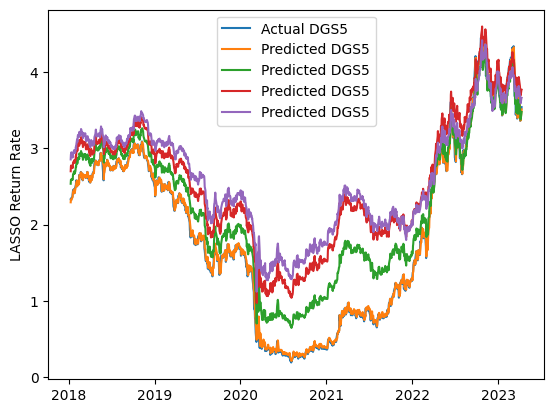

0.48624056316590525


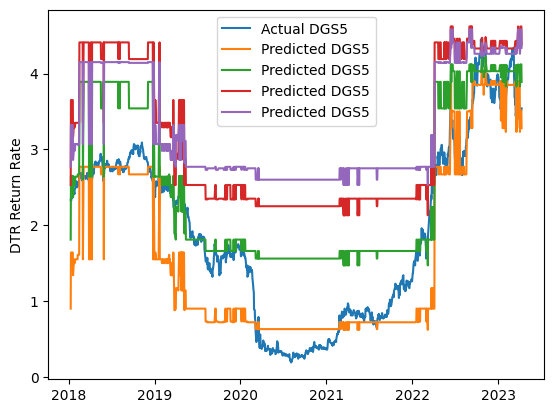

0.00896865447828265


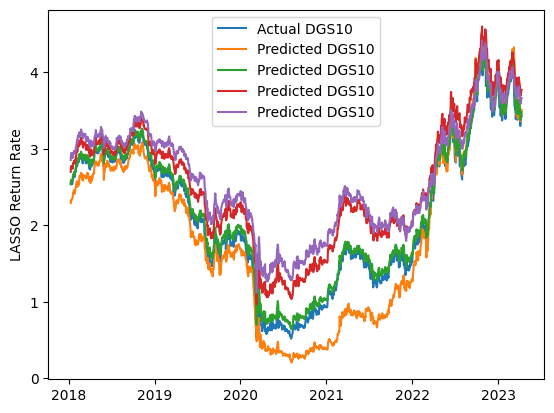

0.5089399923896494


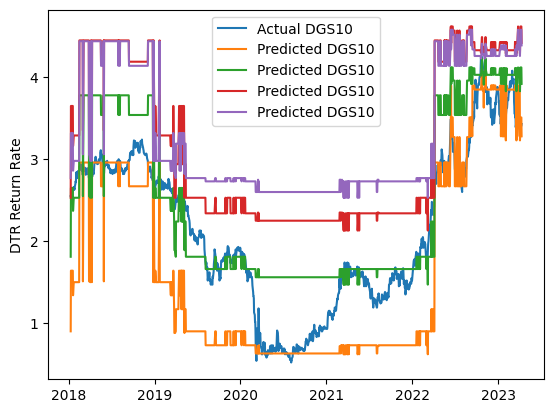

0.00896865447828265


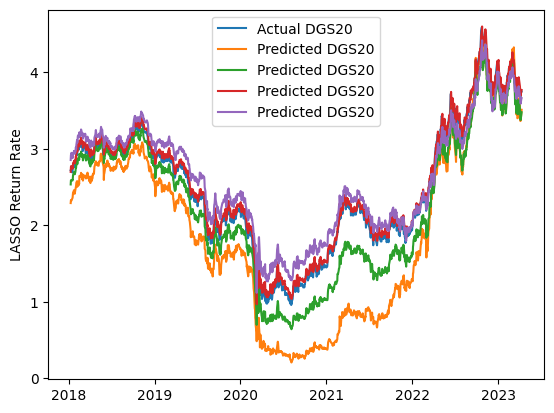

0.5223871385083712


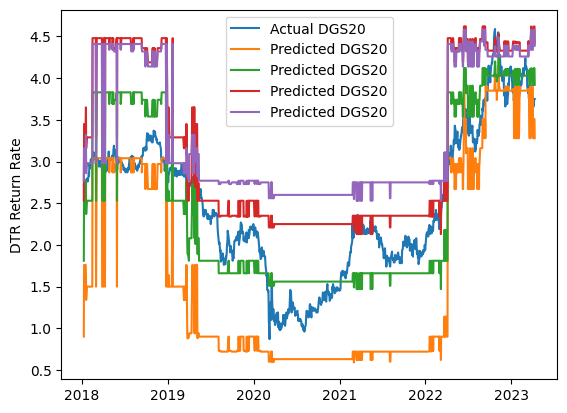

0.00896865447828265


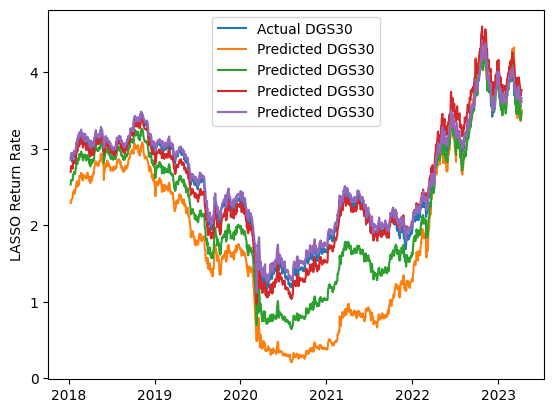

0.5206012557077622


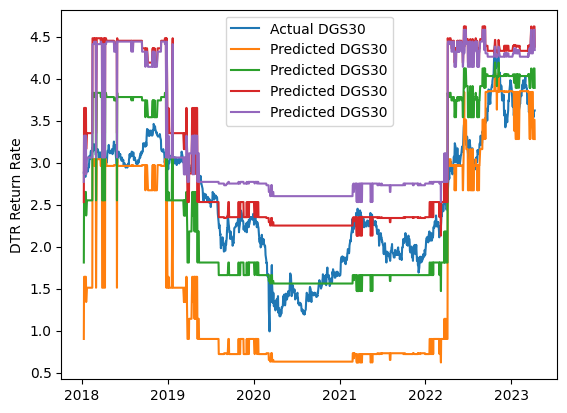

<Figure size 640x480 with 0 Axes>

In [ ]:
## plot to see the fit degree
models={
   'LASSO':Lasso(alpha=0.01),
   'DTR': DecisionTreeRegressor()
}
columns=['DGS5','DGS10','DGS20','DGS30']
for column in columns:
  for name, model in models.items():
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    mse= mean_squared_error(y_test,y_test_pred)
    print(mse)
    plt.plot(test['date'], test[column], label='Actual ' + column)
    plt.plot(test['date'], y_test_pred, label='Predicted ' + column)

    plt.ylabel(name+' Return Rate')
    plt.legend()
    plt.show()
    plt.savefig(name+'figure')

In [ ]:
## y_test prediction data (delta y)
models = {
   'LASSO': Lasso(alpha=0.01),
   'DTR': DecisionTreeRegressor()
}
columns = ['DGS5', 'DGS10', 'DGS20', 'DGS30']

lasso_predictions = pd.DataFrame(columns=['date'] + columns)
dtr_predictions = pd.DataFrame(columns=['date'] + columns)

for column in columns:
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
        if name == 'LASSO':
            lasso_predictions = pd.DataFrame(y_test_pred)
        elif name == 'DTR':
            dtr_predictions = pd.DataFrame(y_test_pred)

lasso_predictions.index = test['date']
lasso_predictions.columns = columns
dtr_predictions.index = test['date']
dtr_predictions.columns = columns

lasso_predictions.insert(0, 'timestamp', lasso_predictions.index)
lasso_predictions.reset_index(drop=True, inplace=True)
lasso_predictions.reset_index(inplace=True)

print("LASSO Predictions:")
print(lasso_predictions)
lasso_predictions.to_csv('lasso' + '_original.csv', index=False)

dtr_predictions.insert(0, 'timestamp', dtr_predictions.index)
dtr_predictions.reset_index(drop=True, inplace=True)
dtr_predictions.reset_index(inplace=True)

print("DTR Predictions:")
print(dtr_predictions)
dtr_predictions.to_csv('dtr' + '_original.csv', index=False)



LASSO Predictions:
      index  timestamp      DGS5     DGS10     DGS20     DGS30
0         0 2018-01-09  2.291614  2.534989  2.698980  2.854450
1         1 2018-01-10  2.330135  2.589634  2.765232  2.920270
2         2 2018-01-11  2.321590  2.589859  2.775250  2.921323
3         3 2018-01-12  2.322485  2.584389  2.767115  2.947674
4         4 2018-01-16  2.350635  2.594885  2.758438  2.896354
...     ...        ...       ...       ...       ...       ...
1309   1309 2023-04-05  3.395299  3.426343  3.753792  3.649219
1310   1310 2023-04-06  3.362940  3.380224  3.705084  3.610237
1311   1311 2023-04-07  3.368645  3.377469  3.693897  3.590646
1312   1312 2023-04-10  3.480300  3.458860  3.758954  3.653869
1313   1313 2023-04-11  3.510460  3.477743  3.768952  3.662617

[1314 rows x 6 columns]
DTR Predictions:
      index  timestamp  DGS5  DGS10  DGS20  DGS30
0         0 2018-01-09  0.83   1.89   2.57   2.89
1         1 2018-01-10  1.76   2.77   3.45   3.16
2         2 2018-01-11  1.76   2.

In [ ]:
lasso_predictions_diff=lasso_predictions_diff[columns].dropna()
lasso_predictions_diff.insert(0,'id',range(len(lasso_predictions_diff)))
lasso_predictions_diff.insert(1, 'timestamp', test['date'].values[1:])
lasso_predictions_diff
lasso_predictions_diff.to_csv('lasso' + '_prediction.csv', index=False)

NameError: ignored

In [ ]:
dtr_predictions_diff=dtr_predictions_diff[columns].dropna()
dtr_predictions_diff.insert(0,'id',range(len(dtr_predictions_diff)))
dtr_predictions_diff.insert(1, 'timestamp', test['date'].values[1:])
dtr_predictions_diff
dtr_predictions_diff.to_csv('dtr' + '_prediction.csv', index=False)

In [ ]:
# link: https://github.com/FrancescaLazzeri/Machine-Learning-for-Time-Series-Forecasting/blob/main/Notebooks/Chapter%205%20-%20Introduction%20to%20Neural%20Networks%20for%20Time%20Series%20Forecasting%20(1).ipynb

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

In [ ]:
!pip install fredapi
from fredapi import Fred

import datetime as dt
from datetime import date, datetime
import os
import warnings
from collections import UserDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Model, Sequential

In [ ]:
api_key = 'b006ce71d52680fa7d8a5b4f0baa0a36'
fred = Fred(api_key=api_key)

tickers = ['DGS5', 'DGS10', 'DGS20','DGS30'] # daily data
start_date = '1990-01-01'
end_date = date.today().strftime('%Y-%m-%d')
df = pd.DataFrame()
for ticker in tickers:
    data = fred.get_series(ticker, start_date, end_date)
    df = pd.concat([df, pd.DataFrame(data, columns=[ticker])], axis=1)
df.dropna(inplace=True)
df.head()

In [ ]:
valid_st_data_load = datetime.strptime("2014-01-01", '%Y-%m-%d')
test_st_data_load = datetime.strptime("2018-01-01", '%Y-%m-%d')

LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS = (10)
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

def mape(ts_predictions, actuals):
    """Mean absolute percentage error"""
    return ((ts_predictions - actuals).abs() / actuals).mean()

MAPE = []
forecast = pd.DataFrame()
delta_y = pd.DataFrame()
result = pd.DataFrame()

In [ ]:
def splitdata(df,idx):
    ticker = tickers[idx]
    ts_data_load = pd.DataFrame(df[ticker])
    ts_data_load.head()
    valid_st_data_load = datetime.strptime("2014-01-01", '%Y-%m-%d')
    test_st_data_load = datetime.strptime("2018-01-01", '%Y-%m-%d')
    train = ts_data_load[ts_data_load.index < valid_st_data_load][[ticker]]
    valid = ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][[ticker]]
    test = ts_data_load[test_st_data_load:][[ticker]]
    return train,valid,test

## NN

In [ ]:
for idx in range(len(tickers)):
    ticker = tickers[idx]
    ts_data_load = pd.DataFrame(df[ticker])

    ts_data_load[ts_data_load.index < valid_st_data_load][[ticker]].rename(columns={ticker: "train"}).join(
      ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][[ticker]].rename(columns={ticker: "validation"}),
      how="outer",
  ).join(
      ts_data_load[test_st_data_load:][[ticker]].rename(columns={ticker: "test"}), how="outer"
  ).plot(
      y=["train", "validation", "test"], figsize=(15, 8), fontsize=12
  )
    '''
    plt.xlabel("timestamp", fontsize=12)
    plt.ylabel(ticker, fontsize=12)
    plt.show()
    '''

    T = 6
    HORIZON = 1
    scaler = MinMaxScaler()
    y_col = "y_t+1"
    X_cols = [ticker+"_t-5", ticker+"_t-4", ticker+"_t-3", ticker+"_t-2", ticker+"_t-1", ticker+"_t"]
    
    train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][[ticker]]
    valid_look_back_dt = valid_st_data_load - dt.timedelta(hours=T - 1)
    valid = ts_data_load.copy()[(ts_data_load.index >= valid_look_back_dt) & (ts_data_load.index < test_st_data_load)][[ticker]]
    test = ts_data_load.copy()[test_st_data_load:][[ticker]]
    train[ticker] = scaler.fit_transform(train)
    valid["load"] = scaler.transform(valid)
    test[ticker] = scaler.transform(test)
    train_shifted = train.copy()
    train_shifted["y_t+1"] = train_shifted[ticker].shift(-1)
    valid_shifted = valid.copy()
    valid_shifted[y_col] = valid_shifted[ticker].shift(-1)
    test_shifted = test.copy()
    test_shifted[y_col] = test_shifted[ticker].shift(-1)
    for t in range(1, T + 1):
      # t = 1, 2, 3, 4, 5, 6
        train_shifted[str(T - t)] = train_shifted[ticker].shift(T - t)
        valid_shifted[X_cols[t-1]] = valid_shifted[ticker].shift(T - t)
        test_shifted[X_cols[t-1]] = test_shifted[ticker].shift(T - t)
    train_shifted.columns = [ticker+"_original"] + [y_col] + X_cols
    train_shifted = train_shifted.dropna(how="any")
    valid_shifted = valid_shifted.dropna(how="any")
    test_shifted = test_shifted.dropna(how="any")
    def prepare_date(data_shifted):
        Y = data_shifted[y_col].to_numpy()
        X = data_shifted[X_cols].to_numpy()
        X = X.reshape(X.shape[0], T, 1)
        return X, Y
    X_train, y_train = prepare_date(train_shifted)
    X_valid, y_valid = prepare_date(valid_shifted)
    X_test, y_test = prepare_date(test_shifted)

    model = Sequential()
    model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
    model.add(Dense(HORIZON))
    model.compile(optimizer="RMSprop", loss="mse")
  # model.summary()

    model_history = model.fit(
        X_train,
        y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(X_valid, y_valid),
        callbacks=[earlystop],
        verbose=1,
    )

    ts_predictions = model.predict(X_test)
    ev_ts_data = pd.DataFrame(ts_predictions, columns=["t+" + str(t) for t in range(1, HORIZON + 1)])
    ev_ts_data["timestamp"] = test_shifted.index
    ev_ts_data = pd.melt(ev_ts_data, id_vars="timestamp", value_name="prediction", var_name="daily forward")
    ev_ts_data["actual"] = np.transpose(y_test).ravel()
    ev_ts_data[["prediction", "actual"]] = scaler.inverse_transform(
        ev_ts_data[["prediction", "actual"]]
    )
    MAPE += [mape(ev_ts_data["prediction"], ev_ts_data["actual"])]
    ev_ts_data[ev_ts_data.timestamp < "2023-04-05"].plot(
        x="timestamp", y=["prediction", "actual"], style=["r", "b"], figsize=(15, 8)
    )
  
    plt.xlabel("timestamp", fontsize=12)
    plt.ylabel(ticker, fontsize=12)
    plt.show()
    #plt.savefig('/content/drive/My Drive/[2023] Spring/MF728/Project/'+ticker+'_forecast.png')

    prediction = pd.DataFrame(ev_ts_data['prediction'])
    prediction.columns = [ticker]
    forecast = pd.concat([forecast, prediction], axis=1)
  
    delta = pd.DataFrame(prediction.diff(periods=1))
    delta.columns = ['delta_'+ticker]
    delta_y = pd.concat([delta_y, delta], axis=1)

In [ ]:
MAPE = pd.DataFrame(MAPE)
MAPE.columns = ['MAPE']
MAPE.index = tickers
forecast.insert(0, 'timestamp', ev_ts_data['timestamp'])
delta_y.insert(0, 'timestamp', ev_ts_data['timestamp'])
result = pd.merge(forecast, delta_y, on='timestamp')

In [ ]:
MAPE

In [ ]:
result

In [ ]:
result.to_csv('NN-result.csv')

## LSTM

In [ ]:
train0,valid0,test0=splitdata(df,idx=0)
train1,valid1,test1=splitdata(df,idx=1)
train2,valid2,test2=splitdata(df,idx=2)
train3,valid3,test3=splitdata(df,idx=3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
def build_lstm_model(train,valid,test):
    train = pd.concat([train,valid])
    dataset = pd.concat([train,test])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    for i in range(60,len(dataset)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    inputs = dataset[len(dataset) - len(test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    pred = model.predict(X_test)
    pred = scaler.inverse_transform(pred)
    
    return model,pred

In [ ]:
model0,pred0 = build_lstm_model(train0,valid0,test0)
test0['Prediction']=pred0

model1,pred1 = build_lstm_model(train1,valid1,test1)
test1['Prediction']=pred1

model2,pred2 = build_lstm_model(train2,valid2,test2)
test2['Prediction']=pred2

model3,pred3 = build_lstm_model(train3,valid3,test3)
test3['Prediction']=pred3

In [ ]:
forecast = pd.DataFrame(index=test0.index)
forecast = pd.concat([forecast, test0['Prediction'],test1['Prediction'],test2['Prediction'],test3['Prediction']], axis=1)
forecast.columns = tickers
forecast = forecast.loc['2018-01-09':'2023-04-11']

delta = pd.DataFrame(forecast.diff(periods=1)).dropna()
delta.insert(0, 'timestamp', delta.index)
delta.reset_index(inplace=True)
delta.drop(columns='index',inplace=True)

forecast.insert(0, 'timestamp', forecast.index)
forecast.reset_index(inplace=True)
forecast.drop(columns='index',inplace=True)

#forecast.to_csv('LSTM-forecast.csv')
#delta.to_csv('LSTM-delta_yield.csv')

In [ ]:
forecast = pd.read_csv('LSTM-forecast.csv')
forecast = forecast.set_index(['timestamp']).drop(columns=['Unnamed: 0'])
forecast.columns = ['Predict_DGS5','Predict_DGS10','Predict_DGS20','Predict_DGS30']
real_data = df.loc['2018-01-09':'2023-04-11']
#real_data['timestamp'] = real_data.index
real_data = real_data.set_index(forecast.index)
dd = pd.concat([forecast,real_data],axis=1)

for idx in range(len(tickers)):
    ticker = tickers[idx]
    dd.plot(y=[ticker, "Predict_"+ticker], style=["r", "b"], figsize=(15, 8),title=ticker+" Comparision")
    print('mape of '+ticker+" :",mape(dd["Predict_"+ticker], dd[ticker]))

## SVM

In [ ]:
train0,valid0,test0=splitdata(df,idx=0)
train1,valid1,test1=splitdata(df,idx=1)
train2,valid2,test2=splitdata(df,idx=2)
train3,valid3,test3=splitdata(df,idx=3)

In [ ]:
from sklearn.svm import SVR  
from sklearn.preprocessing import MinMaxScaler
def build_svm_model(train,valid,test):
    train = pd.concat([train,valid])
    dataset = pd.concat([train,test])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    for i in range(6,len(dataset)):
        x_train.append(scaled_data[i-6:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = x_train.reshape(len(x_train),6)
    y_train=y_train.reshape(len(y_train))
    
    svr_clf = SVR(kernel='rbf', gamma=0.1) 
    model = svr_clf.fit(x_train, y_train)
    
    inputs = dataset[len(dataset) - len(test) - 6:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(6,inputs.shape[0]):
        X_test.append(inputs[i-6:i,0])
    X_test = np.array(X_test)

    X_test = X_test.reshape(len(X_test),6)
    
    pred = model.predict(X_test)
    
    pred = pred.reshape(1,-1)
    
    pred = scaler.inverse_transform(pred)
    
    pred=pred.reshape(-1,1)
    pred_l=[]
    for i in pred:
        pred_l.append(float(i))
    
    return model,pred_l

In [ ]:
svm_model0,svm_pred0 = build_svm_model(train0,valid0,test0)
test0['Prediction']=svm_pred0

svm_model1,svm_pred1 = build_svm_model(train1,valid1,test1)
test1['Prediction']=svm_pred1

svm_model2,svm_pred2 = build_svm_model(train2,valid2,test2)
test2['Prediction']=svm_pred2

svm_model3,svm_pred3= build_svm_model(train3,valid3,test3)
test3['Prediction']=svm_pred3

In [ ]:
svm_forecast = pd.DataFrame(index=test0.index)
svm_forecast = pd.concat([svm_forecast, test0['Prediction'],test1['Prediction'],test2['Prediction'],test3['Prediction']], axis=1)
svm_forecast.columns = tickers
svm_forecast = svm_forecast.loc['2018-01-09':'2023-04-11']

svm_delta = pd.DataFrame(svm_forecast.diff(periods=1)).dropna()
svm_delta.insert(0, 'timestamp', svm_delta.index)
svm_delta.reset_index(inplace=True)
svm_delta.drop(columns='index',inplace=True)

svm_forecast.insert(0, 'timestamp', svm_forecast.index)
svm_forecast.reset_index(inplace=True)
svm_forecast.drop(columns='index',inplace=True)

#svm_forecast.to_csv('SVM-forecast.csv')
#svm_delta.to_csv('SVM-delta_yield.csv')

In [ ]:
forecast_svm = pd.read_csv('SVM-forecast.csv')
forecast_svm = forecast_svm.set_index(['timestamp']).drop(columns=['Unnamed: 0'])
forecast_svm.columns = ['Predict_DGS5','Predict_DGS10','Predict_DGS20','Predict_DGS30']
real_data = df.loc['2018-01-09':'2023-04-11']
#real_data['timestamp'] = real_data.index
real_data = real_data.set_index(forecast_svm.index)
dd_svm = pd.concat([forecast_svm,real_data],axis=1)

for idx in range(len(tickers)):
    ticker = tickers[idx]
    dd_svm.plot(y=[ticker, "Predict_"+ticker], style=["r", "b"], figsize=(15, 8),title=ticker+" Comparision")
    print('mape of '+ticker+" :",mape(dd_svm["Predict_"+ticker], dd_svm[ticker]))

# *Prophet*

In [ ]:
import yfinance as yf
import datetime
from datetime import date

In [ ]:


start_date = '2000-01-01'
end_date = '2023-04-11'
date_range = pd.date_range(start='2018-01-01', end=end_date)

tickers=['DGS5','DGS10','DGS20','DGS30']
df=pd.DataFrame()
for ticker in tickers:
    data= fred.get_series(ticker, start_date, end_date)
    df = pd.concat([df, pd.DataFrame(data,columns=[ticker])],axis=1)

#df.columns=['date','DGS5','DGS10','DGS20','DGS30']
# Download the 30-year Treasury constant maturity rate data (GS30) for the specified date range
#DGS30_data = fred.get_series('DGS30', start_date, end_date)
# Convert the data to a pandas DataFrame
#DGS30_df = pd.DataFrame(DGS30_data, columns=['GS30'])
#print(DGS30_df.head())

In [ ]:
df.index.name = 'date'
df.reset_index(inplace=True)

In [ ]:
# Get S&P 500 data
sp500_data = yf.download('SPY', start=start_date, end=end_date)['Close']
sp500_df = pd.DataFrame(sp500_data).reset_index().rename(columns={'Date': 'date', 'Close': 'SP500'})

# Set the date columns as the index for both DataFrames
df.set_index('date', inplace=True)
sp500_df.set_index('date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.merge(sp500_df, on='date', how='left')

In [ ]:
df['SP500'] = df['SP500'].fillna(df['SP500'].rolling(window=5, min_periods=1).mean())
for ticker in tickers:
    df[ticker] = df[ticker].fillna(df[ticker].rolling(window=5, min_periods=1).mean())

In [ ]:
# Download VIX data
vix_data = yf.download('^VIX', start=start_date, end=end_date)['Close']
vix_df = pd.DataFrame(vix_data).reset_index().rename(columns={'Date': 'date', 'Close': 'VIX'})
vix_df.set_index('date', inplace=True)
# Merge VIX data with the main DataFrame
df = df.merge(vix_df, on='date', how='left')

# Fill missing VIX values with the rolling mean of the last 5 days
df['VIX'] = df['VIX'].fillna(df['VIX'].rolling(window=5, min_periods=1).mean())


[*********************100%***********************]  1 of 1 completed


In [ ]:
df['date']=df.index

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])




In [ ]:
df = df.drop_duplicates(subset=['date']).reset_index(drop=True)

In [ ]:
predictions_df = pd.DataFrame()

In [ ]:
forecast = pd.DataFrame()

In [ ]:
start_date_train = '2000-01-09'
end_date_train = '2014-04-11'
start_date_val = '2014-04-12'
end_date_val = '2018-01-08'
start_date_test = '2018-01-09'
end_date_test = '2023-04-11'

train = df[df['date'].between(start_date_train, end_date_train)]
val = df[df['date'].between(end_date_train, start_date_test)]
test = df[df['date'].between(start_date_test, end_date_test)]

In [ ]:
from prophet import Prophet

In [ ]:
for ticker in tickers:
    # Prepare the dataset for Prophet
    train_temp = train[['date', ticker]].rename(columns={'date': 'ds', ticker: 'y'})

    # Initialize the Prophet model with the S&P 500, VIX, and DCOILWTICO as regressors
    model = Prophet()
    model.add_regressor('SP500')
    model.add_regressor('VIX')
    

    # Add the S&P 500, VIX, and DCOILWTICO data to the train dataset
    train_temp['SP500'] = train['SP500']
    train_temp['VIX'] = train['VIX']
    

    # Fit the model using the train dataset
    model.fit(train_temp)

    # Create a future dataframe
    future = model.make_future_dataframe(periods=(pd.to_datetime(end_date_test) - train['date'].max()).days)

    future['ds'] = pd.to_datetime(future['ds'])

    # Add the S&P 500, VIX, and DCOILWTICO data to the future dataset
    future = future.merge(df[['date', 'SP500', 'VIX']], left_on='ds', right_on='date', how='left')
    future.drop(columns=['date'], inplace=True)

    # Fill the NaN values in the 'SP500', 'VIX', and 'DCOILWTICO' columns with the rolling mean of the last 5 days
    future['SP500'].fillna(future['SP500'].rolling(window=5, min_periods=1).mean(), inplace=True)
    future['VIX'].fillna(future['VIX'].rolling(window=5, min_periods=1).mean(), inplace=True)
    

    # Forecast the target variable
    forecast = model.predict(future)
    val_forecast = forecast[forecast['ds'].between(end_date_train, start_date_test)]
    test_forecast = forecast[forecast['ds'].between(start_date_test, end_date_test)]

    test_forecast['ticker'] = ticker
    
    # Append the validation and test forecasts to the predictions_df

    predictions_df = predictions_df.append(test_forecast[['ds', 'yhat', 'ticker']])



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwifs0ck9/cz6ny0aq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwifs0ck9/jai_9xi2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27659', 'data', 'file=/tmp/tmpwifs0ck9/cz6ny0aq.json', 'init=/tmp/tmpwifs0ck9/jai_9xi2.json', 'output', 'file=/tmp/tmpwifs0ck9/prophet_model9n_e64rz/prophet_model-20230501004522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-95-ea9d610a87c5>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
predictions_df.reset_index(drop=True, inplace=True)

# Drop duplicates
predictions_df.drop_duplicates(subset=['ds', 'ticker'], inplace=True)

reshaped_predictions_df = predictions_df.pivot(index='ds', columns='ticker', values='yhat')
reshaped_predictions_df.reset_index(inplace=True)

reshaped_predictions_df = reshaped_predictions_df[['ds', 'DGS5', 'DGS10', 'DGS20', 'DGS30']]
# Rename 'ds' column to 'timestamp'
reshaped_predictions_df.rename(columns={'ds': 'timestamp'}, inplace=True)
# Change the format of the 'timestamp' column
reshaped_predictions_df['timestamp'] = reshaped_predictions_df['timestamp'].dt.strftime('%Y/%m/%d')
print(reshaped_predictions_df)


ticker   timestamp      DGS5     DGS10     DGS20     DGS30
0       2018/01/09  2.104357  3.255141  3.699841  3.878742
1       2018/01/10  2.077316  3.227831  3.678130  3.860893
2       2018/01/11  2.158107  3.320247  3.763512  3.941305
3       2018/01/12  2.240321  3.415387  3.850162  4.019594
4       2018/01/13  2.477916  3.868185  4.379239  4.502197
...            ...       ...       ...       ...       ...
1914    2023/04/07  4.005466  5.237773  5.281117  5.233119
1915    2023/04/08  4.328779  5.781891  5.891621  5.788457
1916    2023/04/09  4.327059  5.780614  5.890008  5.787389
1917    2023/04/10  4.026091  5.261056  5.299970  5.250886
1918    2023/04/11  3.984624  5.218668  5.261103  5.215934

[1919 rows x 5 columns]


delta_y


In [ ]:
delta_predictions_df = reshaped_predictions_df.copy()

for ticker in tickers:
    delta_predictions_df[ticker] = reshaped_predictions_df[ticker].diff()
delta_predictions_df = delta_predictions_df.iloc[1:]

# Save the delta_predictions_df to a CSV file


delta_predictions_df.reset_index(drop=True, inplace=True)

# Print the delta_predictions_df
print(delta_predictions_df)


ticker   timestamp      DGS5     DGS10     DGS20     DGS30
0       2018/01/10 -0.027041 -0.027310 -0.021711 -0.017849
1       2018/01/11  0.080791  0.092416  0.085382  0.080412
2       2018/01/12  0.082214  0.095140  0.086650  0.078288
3       2018/01/13  0.237594  0.452798  0.529077  0.482604
4       2018/01/14  0.011873  0.016290  0.015423  0.015565
...            ...       ...       ...       ...       ...
1913    2023/04/07  0.007726  0.011802  0.009457  0.005870
1914    2023/04/08  0.323312  0.544118  0.610504  0.555338
1915    2023/04/09 -0.001720 -0.001277 -0.001613 -0.001069
1916    2023/04/10 -0.300968 -0.519559 -0.590038 -0.536503
1917    2023/04/11 -0.041466 -0.042387 -0.038867 -0.034951

[1918 rows x 5 columns]


In [ ]:
start_date = '2018-01-09'
end_date = '2023-04-11'
tickers = ['DGS5', 'DGS10', 'DGS20', 'DGS30']
df_real = pd.DataFrame()

for ticker in tickers:
    data = fred.get_series(ticker, start_date, end_date)
    if df_real.empty:
        df_real = pd.DataFrame(data, columns=[ticker])
    else:
        df_real[ticker] = data.values
        
# Fill missing values with the next available value
df_real = df_real.fillna(method='bfill')
print(df_real)

            DGS5  DGS10  DGS20  DGS30
2018-01-09  2.33   2.55   2.72   2.88
2018-01-10  2.32   2.55   2.73   2.88
2018-01-11  2.32   2.54   2.72   2.91
2018-01-12  2.35   2.55   2.71   2.85
2018-01-15  2.36   2.54   2.69   2.83
...          ...    ...    ...    ...
2023-04-05  3.36   3.30   3.67   3.56
2023-04-06  3.37   3.30   3.66   3.54
2023-04-07  3.49   3.39   3.73   3.61
2023-04-10  3.52   3.41   3.74   3.62
2023-04-11  3.54   3.43   3.75   3.62

[1371 rows x 4 columns]


In [ ]:
# Convert 'timestamp' column to datetime64[ns] dtype
reshaped_predictions_df['timestamp'] = pd.to_datetime(reshaped_predictions_df['timestamp'])

# Merge real data with the reshaped_predictions_df
comparison_df = pd.merge(reshaped_predictions_df, df_real, left_on='timestamp', right_index=True, how='left', suffixes=('_pred', '_real'))

# Fill missing values with the next available value in the comparison_df
comparison_df.fillna(method='bfill', inplace=True)

# Separate DataFrames for each maturity
DGS5_df = comparison_df[['timestamp', 'DGS5_pred', 'DGS5_real']]
DGS10_df = comparison_df[['timestamp', 'DGS10_pred', 'DGS10_real']]
DGS20_df = comparison_df[['timestamp', 'DGS20_pred', 'DGS20_real']]
DGS30_df = comparison_df[['timestamp', 'DGS30_pred', 'DGS30_real']]

# Print the first few rows of each DataFrame
print("DGS5 DataFrame:")
print(DGS5_df)
print("\nDGS10 DataFrame:")
print(DGS10_df)
print("\nDGS20 DataFrame:")
print(DGS20_df)
print("\nDGS30 DataFrame:")
print(DGS30_df)


DGS5 DataFrame:
      timestamp  DGS5_pred  DGS5_real
0    2018-01-09   2.104357       2.33
1    2018-01-10   2.077316       2.32
2    2018-01-11   2.158107       2.32
3    2018-01-12   2.240321       2.35
4    2018-01-13   2.477916       2.36
...         ...        ...        ...
1914 2023-04-07   4.005466       3.49
1915 2023-04-08   4.328779       3.52
1916 2023-04-09   4.327059       3.52
1917 2023-04-10   4.026091       3.52
1918 2023-04-11   3.984624       3.54

[1919 rows x 3 columns]

DGS10 DataFrame:
      timestamp  DGS10_pred  DGS10_real
0    2018-01-09    3.255141        2.55
1    2018-01-10    3.227831        2.55
2    2018-01-11    3.320247        2.54
3    2018-01-12    3.415387        2.55
4    2018-01-13    3.868185        2.54
...         ...         ...         ...
1914 2023-04-07    5.237773        3.39
1915 2023-04-08    5.781891        3.41
1916 2023-04-09    5.780614        3.41
1917 2023-04-10    5.261056        3.41
1918 2023-04-11    5.218668        3.43

[191

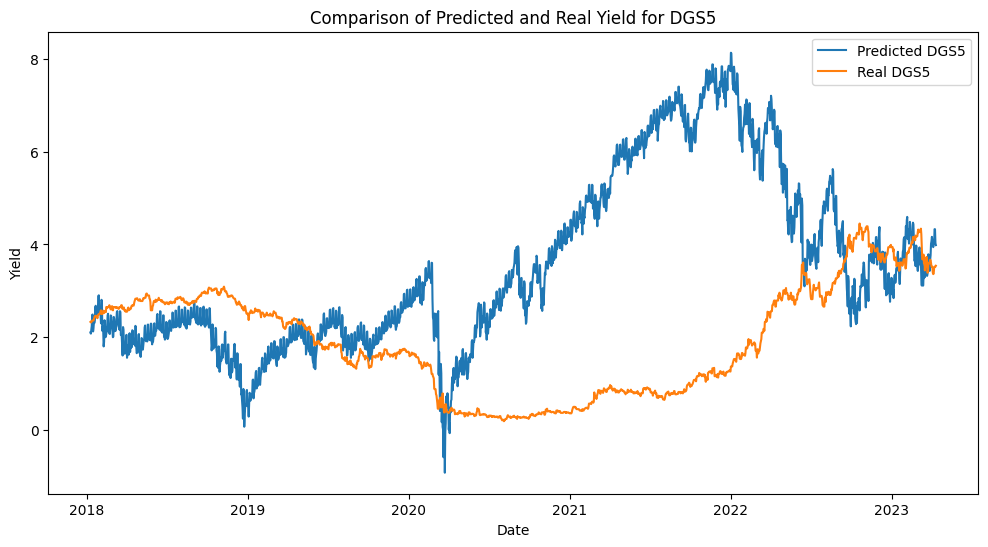

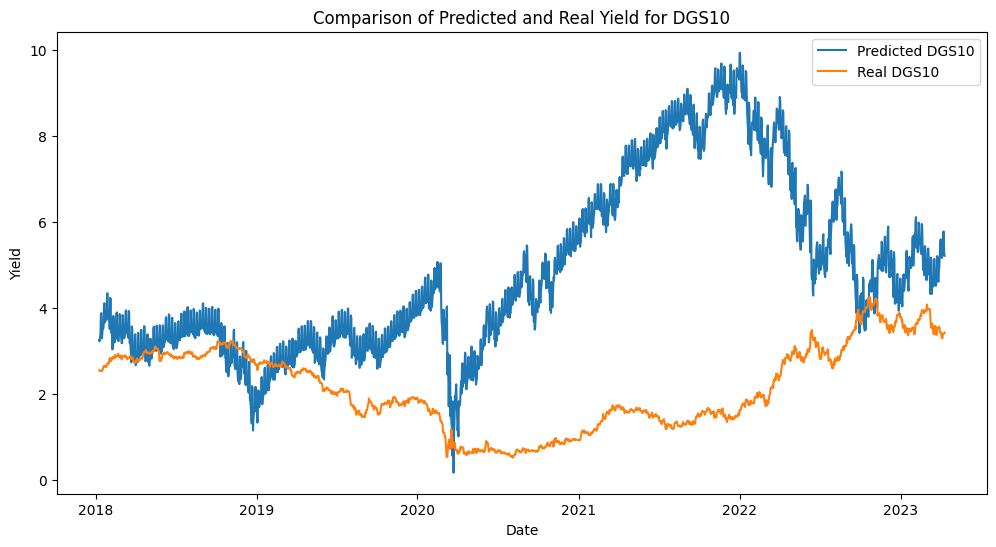

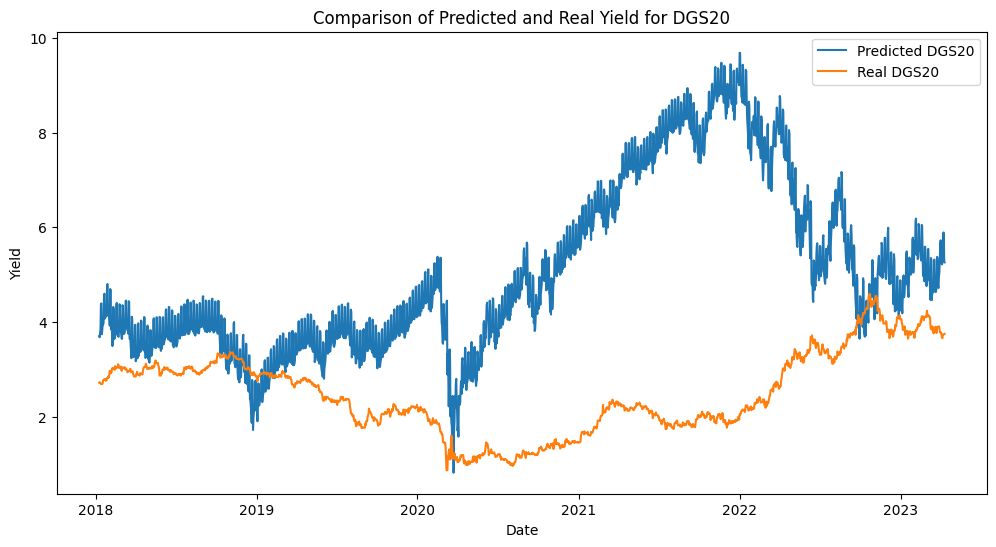

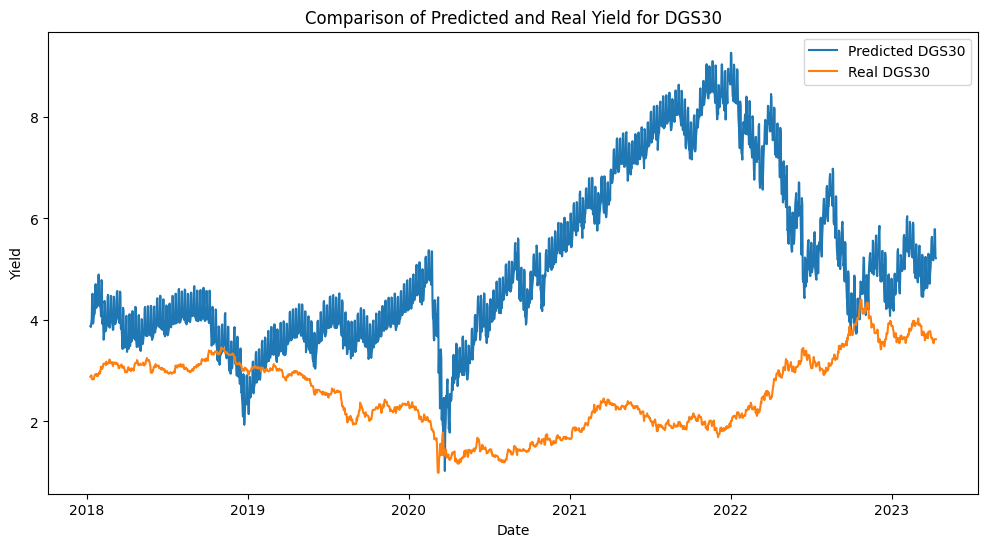

In [ ]:
import matplotlib.pyplot as plt

def plot_maturity(df, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df[f'{ticker}_pred'], label=f"Predicted {ticker}")
    plt.plot(df['timestamp'], df[f'{ticker}_real'], label=f"Real {ticker}")
    plt.xlabel('Date')
    plt.ylabel('Yield')
    plt.title(f"Comparison of Predicted and Real Yield for {ticker}")
    plt.legend()
    plt.show()

# Plot each DataFrame
plot_maturity(DGS5_df, 'DGS5')
plot_maturity(DGS10_df, 'DGS10')
plot_maturity(DGS20_df, 'DGS20')
plot_maturity(DGS30_df, 'DGS30')


In [ ]:
# Calculate Mean Squared Error for each maturity
mse_DGS5 = mean_squared_error(DGS5_df['DGS5_real'], DGS5_df['DGS5_pred'])
mse_DGS10 = mean_squared_error(DGS10_df['DGS10_real'], DGS10_df['DGS10_pred'])
mse_DGS20 = mean_squared_error(DGS20_df['DGS20_real'], DGS20_df['DGS20_pred'])
mse_DGS30 = mean_squared_error(DGS30_df['DGS30_real'], DGS30_df['DGS30_pred'])

# Print the Mean Squared Error for each maturity
print("Mean Squared Error for DGS5:", mse_DGS5)
print("Mean Squared Error for DGS10:", mse_DGS10)
print("Mean Squared Error for DGS20:", mse_DGS20)
print("Mean Squared Error for DGS30:", mse_DGS30)



Mean Squared Error for DGS5: 8.447031517407039
Mean Squared Error for DGS10: 13.140715723547071
Mean Squared Error for DGS20: 11.017503058037125
Mean Squared Error for DGS30: 10.158698882876196
